# Project 10 -- Anthony Micco

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [1]:
# loading important packages
import pandas as pd
import geopandas as gpd

In [2]:
#reading in an example of one year of data (1990)
myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/1990.csv", usecols=[16])
print(myDF)

        Origin
0          CMH
1          CMH
2          CMH
3          CMH
4          CMH
...        ...
5270888    SLC
5270889    SLC
5270890    SLC
5270891    SLC
5270892    SLC

[5270893 rows x 1 columns]


In [3]:
#creating a function to get data from any year
def getDataFromYear(year: int) -> int:
    #function takes in a year as an integer and returns an integer as well

    #read in the data set using the year inputted by converting the int to a string
    df = pd.read_csv("/anvil/projects/tdm/data/flights/subset/" + str(year) + ".csv", usecols=[16])

    #determine the number of values at each origin airport in the data set
    myvalue = myDF['Origin'].value_counts()

    #return the list of values
    return myvalue
    

In [4]:
#checking to see if the function works
print(getDataFromYear(2000))

Origin
ATL    269397
ORD    269128
DFW    237924
LAX    169847
PHX    138558
        ...  
YAP       139
RDM       112
GST        86
SUN        66
PSE        61
Name: count, Length: 235, dtype: int64


In [5]:
#creating a list of the results from 1987 to 2008 
myresults = list(map(getDataFromYear, range(1987,2009)))

In [6]:
#combining all of the results into one large dataset and adding each years data together. 
pd.concat(myresults, axis=1).sum(axis=1)

Origin
ATL    5926734
ORD    5920816
DFW    5234328
LAX    3736634
PHX    3048276
        ...   
YAP       3058
RDM       2464
GST       1892
SUN       1452
PSE       1342
Length: 235, dtype: int64

## Question 2

In [7]:
#reading in data from the airports csv file
airportsDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/airports.csv")

In [8]:
#viewing the head of airportsDF
airportsDF.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [9]:
#viewing the unique values in the state column 
airportsDF["state"].unique()

array(['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'AK', 'ME', 'MA',
       'VT', 'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA',
       'VA', 'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC',
       'NH', 'MD', 'DE', 'WV', 'WY', 'PR', 'RI', nan, 'AS', 'CQ', 'GU',
       'HI', 'VI'], dtype=object)

In [10]:
#filtering out the continental states 
continentalDF = airportsDF[(airportsDF["state"]!="AK") & (airportsDF["state"]!="VI") & (airportsDF["state"]!="PR") & (airportsDF["state"]!="AS") & (airportsDF["state"]!="HI") & (airportsDF["state"]!="GU")&(airportsDF["state"]!="CQ")]

#checking to ensure data is filtered correctly
continentalDF["state"].unique()

array(['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'ME', 'MA', 'VT',
       'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA', 'VA',
       'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC', 'NH',
       'MD', 'DE', 'WV', 'WY', 'RI', nan], dtype=object)

In [11]:
#finding the total number of flights that departed each state (and DC)
counts = continentalDF["state"].value_counts()
counts

state
TX    209
CA    205
OK    102
FL    100
OH    100
GA     97
NY     97
MI     94
MN     89
IL     88
WI     84
IA     78
KS     78
MO     74
AR     74
AL     73
NE     73
NC     72
MS     72
PA     71
MT     71
TN     70
IN     65
WA     65
AZ     59
SD     57
OR     57
LA     55
SC     52
ND     52
NM     51
KY     50
CO     49
VA     47
ID     37
UT     35
NJ     35
ME     34
NV     32
WY     32
MA     30
WV     24
MD     18
CT     15
NH     14
VT     13
RI      6
DE      5
DC      1
Name: count, dtype: int64

In [12]:
#reading in the US GPS data
gpsData = gpd.read_file("/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp")

In [13]:
#filtering out the data from Puerto Rico, Alaska, and Hawaii
continental = gpsData[~gpsData["NAME"].isin(["Puerto Rico", "Hawaii", "Alaska"])]

In [14]:
#checking to see if the data was filtered correctly
pd.unique(continental["NAME"])

array(['Maryland', 'Iowa', 'Delaware', 'Ohio', 'Pennsylvania', 'Nebraska',
       'Washington', 'Alabama', 'Arkansas', 'New Mexico', 'Texas',
       'California', 'Kentucky', 'Georgia', 'Wisconsin', 'Oregon',
       'Missouri', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Illinois', 'Montana', 'Minnesota',
       'Indiana', 'Massachusetts', 'Kansas', 'Nevada', 'Vermont',
       'Connecticut', 'New Jersey', 'District of Columbia',
       'North Carolina', 'Utah', 'North Dakota', 'South Carolina',
       'Mississippi', 'Colorado', 'South Dakota', 'Oklahoma', 'Wyoming',
       'West Virginia', 'Maine', 'New Hampshire', 'Arizona',
       'Rhode Island'], dtype=object)

In [15]:
#renaming the STUSPS column
continental = continental.rename(columns={"STUSPS":"STATE"})

In [16]:
#checking to make sure the column was renamed correctly
continental.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STATE', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [17]:
#adding in a color column
continental = continental.assign(mycolors='blue')

In [18]:
#looping through counts item to reassign colors based on states in the top 10 of most departed flights
for state, count in counts.items():
    #the 10th largest count was 88 departed flights, so if the flight count was larger than 10 make the color red to 
    #indicate the state was in the top 10
    if (count >= 88):
        continental[continental["STATE"] == state] = continental.assign(mycolors="red")
        

<Axes: >

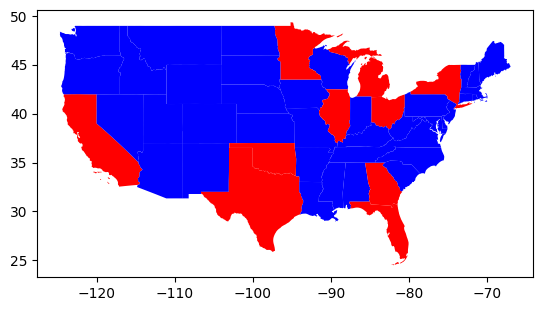

In [19]:
#plotting the updated data with the states with the top 10 most departed flights
continental.plot(color=continental["mycolors"])

Markdown notes and sentences and analysis written here.

## Question 3

In [23]:
#reading in the data from the boundary data set
boundaryData = gpd.read_file('/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp')

In [24]:
#filtering out the data so we only have the 48 continental states (and DC)
continentalStateData = boundaryData[(boundaryData['NAME'] != 'Alaska') & (boundaryData['NAME'] != 'Hawaii') & (boundaryData['NAME'] != 'Puerto Rico')]

In [25]:
#assigning a new column colors
continentalStateData = continentalStateData.assign(mycolors='green')

In [26]:
#reading in the airports data again
myDF = pd.read_csv('/anvil/projects/tdm/data/flights/subset/airports.csv')

In [27]:
#creating a dataframe using the lat/long geo data
gdf = gpd.GeoDataFrame(myDF, geometry=gpd.points_from_xy(myDF.long, myDF.lat), crs="NAD83")

In [28]:
#filtering out the continental states
gdfcontinentaldata = gdf[(gdf['geometry'].bounds.minx < -50) & (gdf['geometry'].bounds.minx > -125)]

In [29]:
#creating a new color column in the df
gdfcontinentaldata = gdfcontinentaldata.assign(mycolors='blue')

In [30]:
#concatenating the two data frames in order to plot them
myresults = pd.concat([continentalStateData[['geometry','mycolors']], gdfcontinentaldata[['geometry','mycolors']]])

<Axes: >

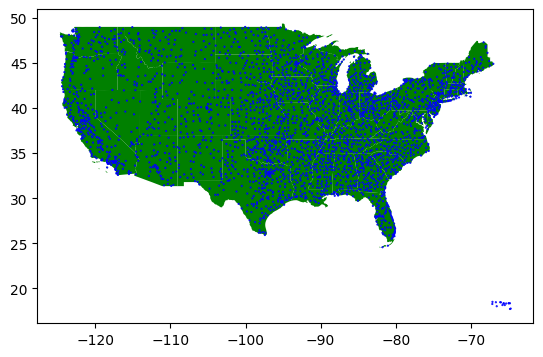

In [31]:
#plotting the airport locations
myresults.plot(markersize = 0.3, color=myresults['mycolors'])

## Question 4

In [33]:
#reading in data from the airports csv file
electionsDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont1980.txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')

In [34]:
#viewing the head of the 1980 elections DF
electionsDF.head()

,9,14
0,MI,400
1,MI,1500
2,MI,300
3,MI,1000
4,IL,200


In [35]:
#defining function to get data from a specific year
def getDonations (year: int) -> int:
    #function takes in a year as an integer and returns an integer as well
    
    #reading in the data from the elections data set
    myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(year) + ".txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')

    #renaming the columns
    myDF.columns = ["STATE", "TRANSACTION_AMT"]

    #grouping the values by state and finding the total amount of transactions for each state
    myvalue = myDF.groupby('STATE')['TRANSACTION_AMT'].sum()

    #returning the list of transaction amounts by state
    return myvalue

In [37]:
#checking to see if the function works
getDonations(1980)

STATE
01       1550
AK     531485
AL    2596149
AR     954867
AS       1500
       ...   
WA    1872939
WI    1342009
WV     414924
WY     504073
ZZ     302079
Name: TRANSACTION_AMT, Length: 61, dtype: int64

In [38]:
#getting a list of the transactions from 1980 to 2019
myresults = list(map(getDonations, range(1980,2019,2)))

In [39]:
#combining all the total transactions from each year for each state
pd.concat(myresults, axis=1).sum(axis=1)

STATE
01         1814.0
AK     61180328.0
AL    271578030.0
AR    235648443.0
AS       384227.0
         ...     
SR          210.0
SY           40.0
TW           50.0
U*          195.0
VD          225.0
Length: 267, dtype: float64

In [41]:
#finding the states with the top 10 most donations
mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)

In [42]:
mycounts

STATE
NJ    9.230388e+08
MA    1.085497e+09
PA    1.150426e+09
VA    1.246253e+09
IL    1.568633e+09
FL    2.097903e+09
DC    2.420819e+09
TX    2.619004e+09
NY    3.790392e+09
CA    4.822789e+09
dtype: float64

## Question 5

In [43]:
#reading in the US GPS data
gpsData = gpd.read_file("/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp")

In [44]:
#filtering out the data from Puerto Rico, Alaska, and Hawaii
continental = gpsData[~gpsData["NAME"].isin(["Puerto Rico", "Hawaii", "Alaska"])]

In [45]:
#checking to see if the data was filtered correctly
pd.unique(continental["NAME"])

array(['Maryland', 'Iowa', 'Delaware', 'Ohio', 'Pennsylvania', 'Nebraska',
       'Washington', 'Alabama', 'Arkansas', 'New Mexico', 'Texas',
       'California', 'Kentucky', 'Georgia', 'Wisconsin', 'Oregon',
       'Missouri', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Illinois', 'Montana', 'Minnesota',
       'Indiana', 'Massachusetts', 'Kansas', 'Nevada', 'Vermont',
       'Connecticut', 'New Jersey', 'District of Columbia',
       'North Carolina', 'Utah', 'North Dakota', 'South Carolina',
       'Mississippi', 'Colorado', 'South Dakota', 'Oklahoma', 'Wyoming',
       'West Virginia', 'Maine', 'New Hampshire', 'Arizona',
       'Rhode Island'], dtype=object)

In [46]:
#renaming the STUSPS column
continental = continental.rename(columns={"STUSPS":"STATE"})

In [47]:
#checking to make sure the column was renamed correctly
continental.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STATE', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [56]:
#adding in a color column
continental = continental.assign(mycolors='blue')

In [ ]:
#assigning the states with the 10 high transaction amounts the color red
for state, count in mycounts.items():
    #if the total transaction amount is greater than 9.230388e+08 then change the color to red
    if(count >= 9.230388e+08):
        continental[continental["STATE"]==state] = continental.assign(mycolors="red")

<Axes: >

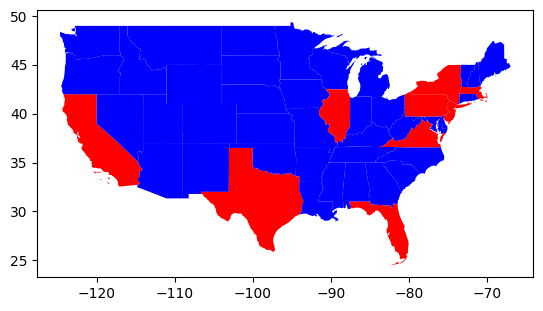

In [60]:
#plotting the data
continental.plot(color=continental["mycolors"])

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.